<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/forecasting_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/dreamlone/microsoft-stocks-price-prediction-automl

In [1]:
# Additional imports
import pandas as pd
import numpy as np

# Imports for creating plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

In [16]:
table_data = pd.read_csv('https://raw.githubusercontent.com/TAUforPython/machinelearning/main/test_datasets/UsdRubTime.csv', delimiter = ';')
print(table_data)
table_data.info()

       Close        Data  Position
0      0.988  22.08.1993         1
1      0.993  29.08.1993         8
2      1.000  05.09.1993        15
3      1.020  12.09.1993        22
4      1.300  19.09.1993        29
...      ...         ...       ...
1537  73.348  05.02.2023     10760
1538  74.230  12.02.2023     10767
1539  76.135  19.02.2023     10774
1540  75.712  26.02.2023     10781
1541  76.072  05.03.2023     10788

[1542 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1542 non-null   float64
 1   Data      1542 non-null   object 
 2   Position  1542 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.3+ KB


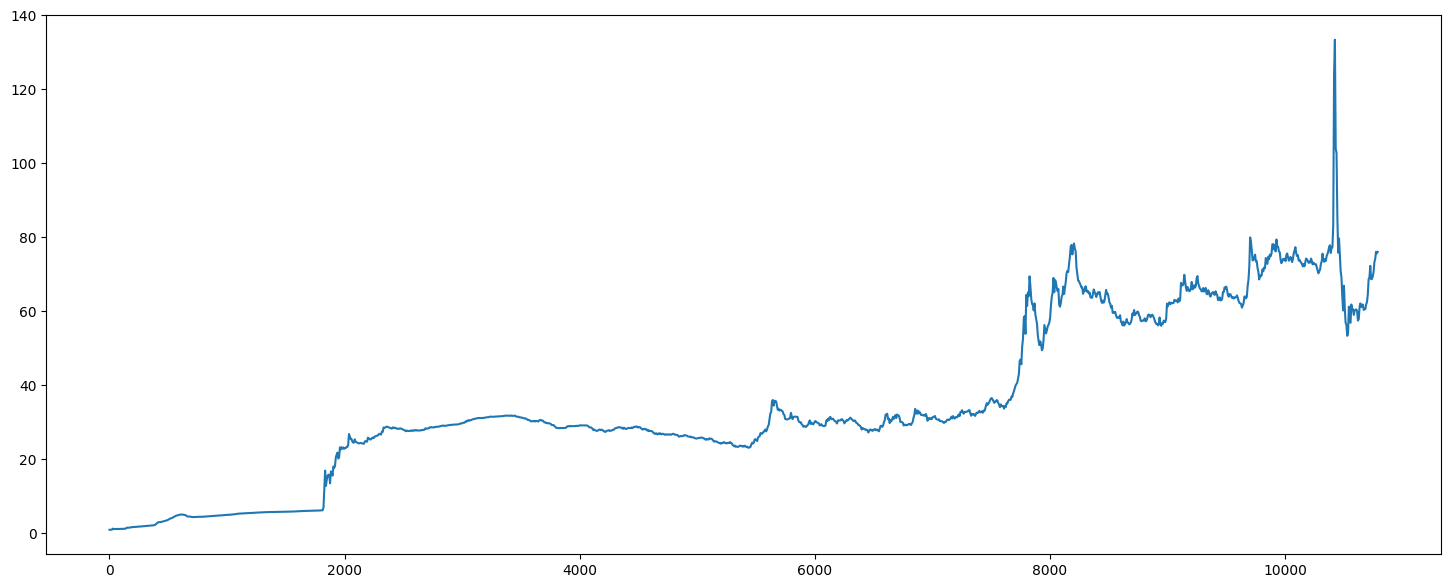

In [18]:
plt.plot(table_data['Position'], table_data['Close'])
plt.show()

In [21]:
train_size = int(len(table_data)*0.75)
test_size = len(table_data) - train_size
forecast_length = test_size

In [25]:
!pip install fedot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.7 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.3/282.3 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.1/350.1 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━

In [24]:
from fedot.api.main import Fedot

# Chain and nodes
from fedot.core.chains.chain import Chain
from fedot.core.chains.node import PrimaryNode, SecondaryNode

# Data
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum

# Tasks
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

# Metric
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: No module named 'fedot'

In [ ]:

task = Task(TaskTypesEnum.ts_forecasting,
            TsForecastingParams(forecast_length=forecast_length))

# Load data from csv file and wrap it into InputData structure
input_data = InputData.from_csv_time_series(task, file_path, target_column='Close')

# Divide into train and test
train_data, test_data = train_test_data_setup(input_data)

In [ ]:
# Define parameters
task_parameters = TsForecastingParams(forecast_length=forecast_length)

# Init model for the time series forecasting
model = Fedot(problem='ts_forecasting', task_params=task_parameters)

# Run AutoML model design in the same way
chain = model.fit(features=train_data)

In [ ]:
# Use model to obtain forecast
forecast = model.predict(features=test_data)

In [ ]:
def display_results(actual_time_series, predicted_values, len_train_data, y_name = 'Microsoft Stocks Price'):
    """
    Function for drawing plot with predictions and check metrics

    :param actual_time_series: the entire array with one-dimensional data
    :param predicted_values: array with predicted values
    :param len_train_data: number of elements in the training sample
    :param y_name: name of the y axis
    """

    plt.plot(np.arange(0, len(actual_time_series)),
             actual_time_series, label = 'Actual values', c = 'green')
    plt.plot(np.arange(len_train_data, len_train_data + len(predicted_values)),
             predicted_values, label = 'Predicted', c = 'blue')
    # Plot black line which divide our array into train and test
    plt.plot([len_train_data, len_train_data],
             [min(actual_time_series), max(actual_time_series)], c = 'black', linewidth = 1)
    plt.ylabel(y_name, fontsize = 15)
    plt.xlabel('Time index', fontsize = 15)
    plt.legend(fontsize = 15, loc='upper left')
    plt.grid()
    plt.show()

    mae_value = mean_absolute_error(actual_time_series[len_train_data:], predicted_values)
    print(f'MAE value: {mae_value}')

In [ ]:
display_results(np.array(df['Close']), forecast, len(train_data.features))
